In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import uniform
from scipy.stats import randint as sp_randint

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import ParameterSampler

from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por_modelling_range-G3-10_repaired-G3-0-values.pkl')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,6,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,6,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,6,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,7,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,7,0,1,0,0,0,1,0,0,0,1,0,1,0


## PCA 

In [3]:
X = np.array(df_por.drop('G3',axis = 1))

In [4]:
sc = MinMaxScaler()
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X = sc.transform(X)

X

array([[ 0.73094388,  0.83337685,  1.03169516, ..., -0.53160953,
        -0.55539872,  0.65297291],
       [ 0.73094388,  0.83337685,  0.21013668, ..., -0.53160953,
         1.80050828, -1.53145709],
       [ 0.73094388,  0.83337685, -1.43298028, ..., -0.53160953,
        -0.55539872,  0.65297291],
       ...,
       [-1.36809408,  0.83337685,  1.03169516, ..., -0.53160953,
        -0.55539872,  0.65297291],
       [-1.36809408, -1.19993734,  0.21013668, ..., -0.53160953,
        -0.55539872,  0.65297291],
       [-1.36809408, -1.19993734,  1.03169516, ..., -0.53160953,
        -0.55539872,  0.65297291]])

In [6]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

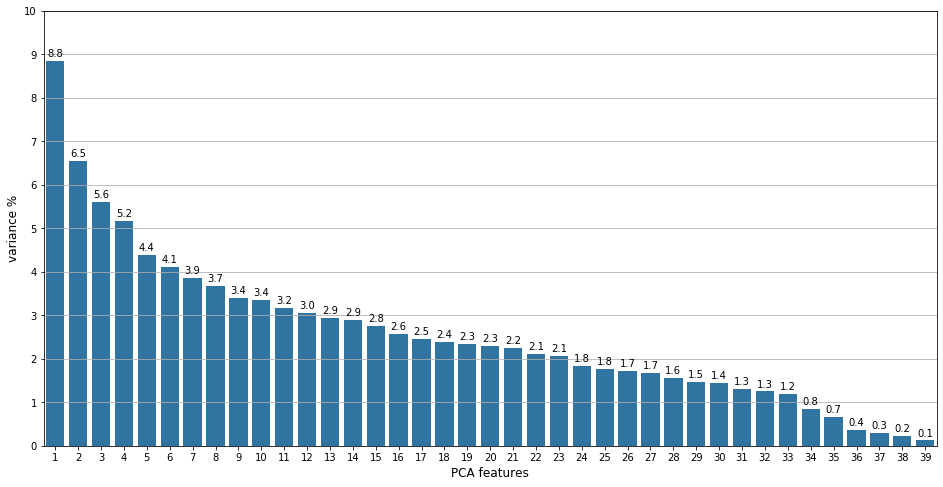

In [7]:
plt.figure(figsize = (16,8))
ax = sns.barplot(list(range(1,pca.n_components_ + 1)),pca.explained_variance_ratio_ * 100,color = '#1f77b4')
plt.yticks(np.arange(0,11,1))
plt.ylim(0,10)
ax.yaxis.grid(True)
plt.xlabel('PCA features',fontsize = 12)
plt.ylabel('variance %',fontsize = 12)

for rect,label in zip(ax.patches,np.around(pca.explained_variance_ratio_ * 100,1)):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2,height + 0.05,label,ha = 'center',va = 'bottom');

## DBScan

In [8]:
df_por_pca = pd.DataFrame(pca.transform(X))
df_por_pca = df_por_pca.iloc[:,:3]

df_por_pca.shape

(649, 3)

In [9]:
model = DBSCAN()
y_dbscan = model.fit_predict(df_por_pca)

y_dbscan

array([-1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  1,  2,  7, -1,
       -1, -1,  1, -1, -1,  5, -1, -1,  8,  0, -1, -1, -1, -1, -1,  3,  6,
        0,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,  5, -1, -1,
       11, -1,  3, -1,  0, -1, -1, -1,  6,  3, -1, -1, -1, -1,  3, -1, -1,
       -1, -1, -1, 11,  0,  0,  1, -1,  6,  2, -1,  0, -1,  2,  7, -1,  0,
       -1,  0, 11,  8, -1, 11,  5,  0, -1, -1, -1,  1,  0,  7, -1, -1, -1,
       -1,  7,  1, -1, -1, -1, -1,  1, -1, -1,  0,  5,  8, -1, -1, -1, -1,
        8, -1, -1, -1, 12,  0, -1, -1, -1, -1,  0, -1, -1,  9,  0, -1,  8,
       -1, -1, 13, -1, -1, -1, -1, -1, -1,  0, 10, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 13, -1,
       -1,  0, -1, -1, -1, 10, 10, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,
       -1, 11, -1, -1, -1, -1,  0, -1,  5, -1, -1,  2, -1, -1,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5,  2,  0,  0, -1, -1,  0,
       -1,  0, -1, 11, -1

In [10]:
pd.Series(y_dbscan).value_counts()

-1     440
 0      97
 3      17
 4      14
 1      12
 5      11
 11     10
 8       7
 6       7
 10      6
 2       6
 14      5
 13      5
 12      5
 7       4
 9       3
dtype: int64

In [11]:
parameters_distribution = {'eps':uniform(0,1.5),'min_samples':sp_randint(1,3)}
combinations = 50

list_parameters = list(ParameterSampler(parameters_distribution,n_iter = combinations,random_state = 42))

list_parameters

[{'eps': 0.5618101782710437, 'min_samples': 1},
 {'eps': 0.2751521847992457, 'min_samples': 2},
 {'eps': 0.8979877262955549, 'min_samples': 1},
 {'eps': 0.6687491292803867, 'min_samples': 1},
 {'eps': 0.08712541825229919, 'min_samples': 2},
 {'eps': 0.5005629167085328, 'min_samples': 2},
 {'eps': 1.0621088666940683, 'min_samples': 2},
 {'eps': 0.08461736854065038, 'min_samples': 2},
 {'eps': 1.2486639612006325, 'min_samples': 2},
 {'eps': 0.0011681487615214925, 'min_samples': 2},
 {'eps': 0.2751067647801507, 'min_samples': 2},
 {'eps': 0.9174797407324213, 'min_samples': 1},
 {'eps': 0.6479175279631737, 'min_samples': 1},
 {'eps': 0.7871619903875837, 'min_samples': 1},
 {'eps': 0.20924079097806275, 'min_samples': 2},
 {'eps': 1.4606332782621887, 'min_samples': 1},
 {'eps': 0.6841049763255539, 'min_samples': 1},
 {'eps': 0.9275790139996309, 'min_samples': 2},
 {'eps': 0.7713516576204174, 'min_samples': 2},
 {'eps': 0.7001443398719699, 'min_samples': 1},
 {'eps': 0.9113172778521575, 'min_

In [12]:
results = []

for parameters in list_parameters:
    y_dbscan = DBSCAN(**parameters).fit_predict(df_por_pca)
    try:
        silhouette_coefficient = silhouette_score(df_por_pca,y_dbscan)
    except ValueError:
        silhouette_coefficient = -1
    results.append([silhouette_coefficient,parameters])

In [13]:
results

[[-0.23426738697976432, {'eps': 0.5618101782710437, 'min_samples': 1}],
 [-0.42776444077283216, {'eps': 0.2751521847992457, 'min_samples': 2}],
 [-0.35223741171331924, {'eps': 0.8979877262955549, 'min_samples': 1}],
 [-0.3938811056329986, {'eps': 0.6687491292803867, 'min_samples': 1}],
 [-1, {'eps': 0.08712541825229919, 'min_samples': 2}],
 [-0.1481241827998043, {'eps': 0.5005629167085328, 'min_samples': 2}],
 [-0.01902319851636294, {'eps': 1.0621088666940683, 'min_samples': 2}],
 [-1, {'eps': 0.08461736854065038, 'min_samples': 2}],
 [0.36105298980300726, {'eps': 1.2486639612006325, 'min_samples': 2}],
 [-1, {'eps': 0.0011681487615214925, 'min_samples': 2}],
 [-0.42776444077283216, {'eps': 0.2751067647801507, 'min_samples': 2}],
 [-0.33457832180916636, {'eps': 0.9174797407324213, 'min_samples': 1}],
 [-0.3818143668972542, {'eps': 0.6479175279631737, 'min_samples': 1}],
 [-0.354909684880719, {'eps': 0.7871619903875837, 'min_samples': 1}],
 [-0.5253513243484472, {'eps': 0.20924079097806

In [14]:
sorted(results,key = lambda x: x[0],reverse = True)[:10]

[[0.38988196946079673, {'eps': 1.42332830588, 'min_samples': 2}],
 [0.38988196946079673, {'eps': 1.480330404900776, 'min_samples': 2}],
 [0.36105298980300726, {'eps': 1.2486639612006325, 'min_samples': 2}],
 [0.36105298980300726, {'eps': 1.1626992350416718, 'min_samples': 2}],
 [0.12670067806399551, {'eps': 0.2939742936287178, 'min_samples': 1}],
 [0.11802195018905255, {'eps': 1.4606332782621887, 'min_samples': 1}],
 [0.11802195018905255, {'eps': 1.4417580365240237, 'min_samples': 1}],
 [0.10061075610737723, {'eps': 0.24790040859450374, 'min_samples': 1}],
 [0.07785315039293982, {'eps': 0.45692065376005603, 'min_samples': 1}],
 [0.07168588292884942, {'eps': 0.21138633746214397, 'min_samples': 1}]]

In [15]:
best_parameters = {'eps':1.42332830588,'min_samples':2}
model = DBSCAN(**best_parameters)

In [16]:
y_dbscan = model.fit_predict(df_por_pca)

pd.Series(y_dbscan).value_counts()

 0    644
-1      5
dtype: int64